Data Understanding

Access and Explore the data set


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

calendar = pd.read_csv(r"C:\Users\rosie\Dev\Nanodegree\Blog post\archive\calendar.csv")
calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Prepare Data

Wrangle and Clean

Notice that the price in in dollars. In order to work effectively with this column, the $ is removed and converted to a float.

In [ ]:
#Use function as will have to be repeated for other datasets

def remove_character(df, column, character1, character2):
    """
    Function to remove up to two general characters from a dataset
    """
    
    df[column]= df[column].str.replace(character1,'', regex=True).str.replace(character2,'', regex=True).astype(float)

    return;

remove_character(calendar, 'price', '$', ',')

calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Question 1: How is the price influenced by the date of the booking?

Much better. From this data set, it would be interesting to know how the price fluctutes depending on the date of booking. 

A daily view of this would be too much infomation, so lets find the mean price of listings, grouped by month. 

[Note] There are many nulls in this column. This is mainly due to the listing not being available so discounting in our analysis is valid.

In [ ]:
#Extracting month from date column, sorting by numerical value

months_df = calendar[['date','price']].copy()
months_df['Month'] = pd.to_datetime(months_df['date'])
months_df['Month'] = months_df.Month.sort_values(ascending=False)

In [ ]:
#Converting to name of month and calculating the mean.
monthly_mean = months_df.groupby(months_df.Month.dt.month_name(), sort=False)['price'].mean()

monthly_mean

Month
January      122.912176
February     124.293927
March        128.644488
April        135.097005
May          139.538183
June         147.473137
July         152.094150
August       150.656594
September    143.255949
October      137.031939
November     135.688738
December     137.251835
Name: price, dtype: float64

Lets visualise this. 

As we can see from the graph below, the price peaks in June, July and August. This could be due to more agreeable weather, school holidays etc.

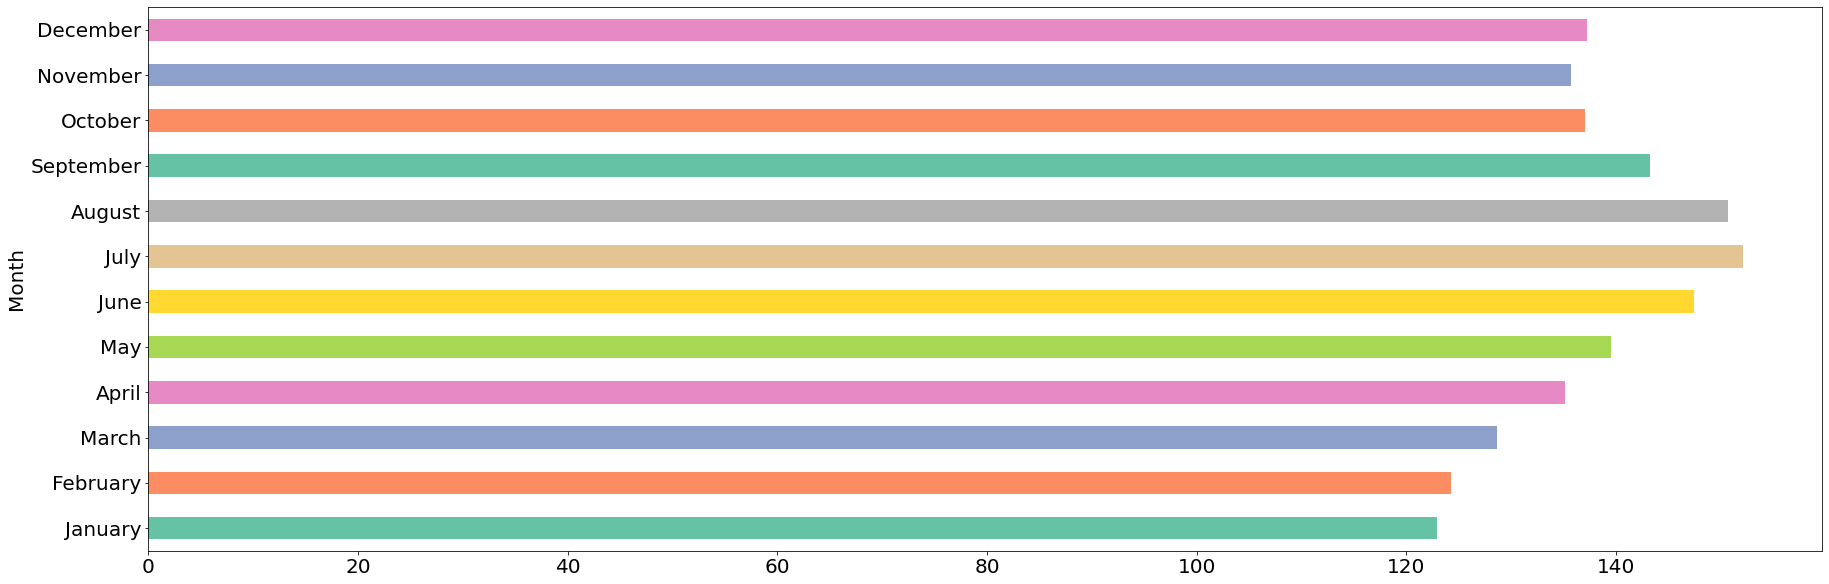

In [ ]:
#plot bar chart to visualise

plt.rcParams.update({'font.size': 20})
my_cmap = plt.get_cmap("Set2")
monthly_mean.plot(kind = 'barh', figsize = (30,10), color=my_cmap.colors);



Question 2: How does location affect the price?

Now we know a little more about how the time of year might affect the price, lets have a deeper look into the other factors influencing price. 

For this analysis, we will utilise the listings dataset. 

In [ ]:
listings = pd.read_csv(r"C:\Users\rosie\Dev\Nanodegree\Blog post\archive\listings.csv")

In [ ]:
remove_character(listings, 'price', '$', ',')

In [ ]:
neighbourhood_mean = listings.groupby(listings.neighbourhood_cleansed)['price'].mean().sort_values(ascending=True)
print(neighbourhood_mean.sort_values(ascending=True))

neighbourhood_cleansed
Rainier Beach          68.555556
Olympic Hills          71.687500
South Delridge         74.666667
Georgetown             76.125000
North Delridge         76.375000
                         ...    
Montlake              182.789474
West Queen Anne       187.769231
Westlake              194.470588
Portage Bay           227.857143
Southeast Magnolia    231.705882
Name: price, Length: 87, dtype: float64


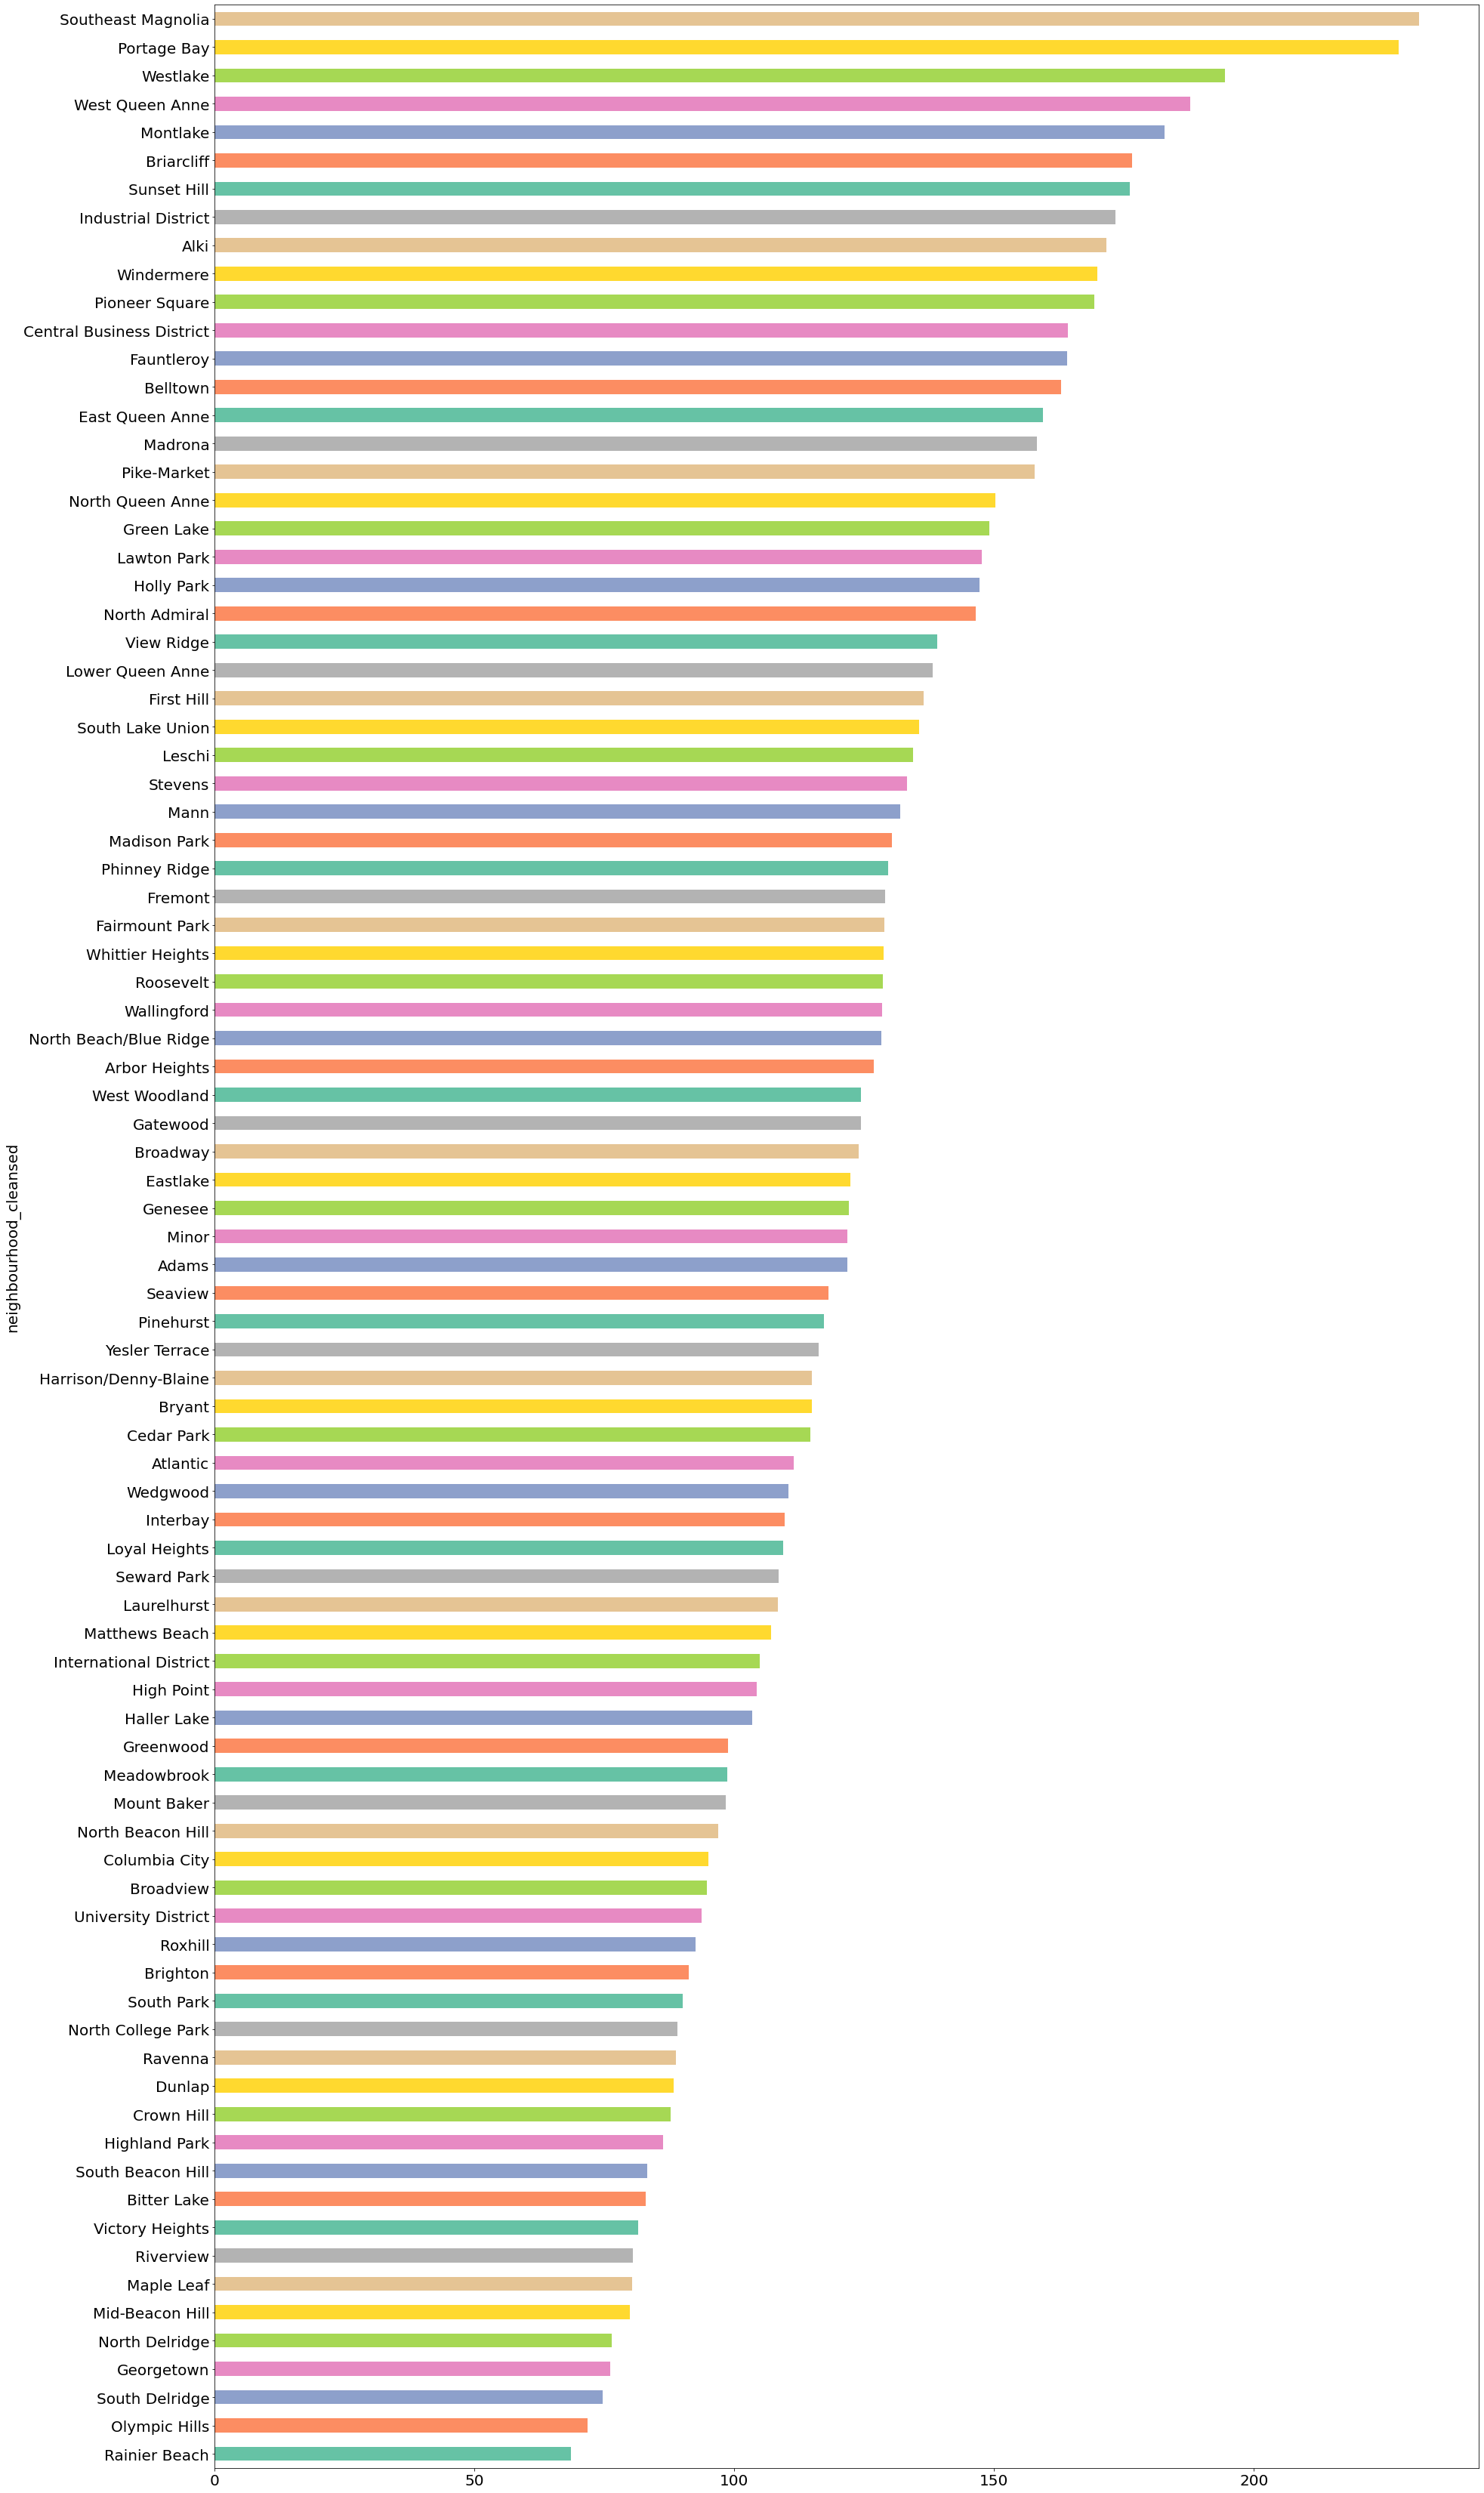

In [ ]:
plt.rcParams.update({'font.size': 20})
my_cmap = plt.get_cmap("Set2")
neighbourhood_mean.plot(kind = 'barh', figsize = (30,60), color=my_cmap.colors);

As you can see, there quite a range in average price depending on the neighbourhood!

Question 3: What are the most influential features of a property with respect to the price?

Now lets try and explore the other features and their impact on the property price in Seattle. 

In [ ]:
listings['price'].isnull().sum()

0

The above shows us that all of the listings in the dataset have a price associated with them. This means dealing with NaN values will not have to be considered in this column

Lets see if we can make the dataset more user friendly, by dropping columns that may not be useful. 

In [ ]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [ ]:
listings = listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url','host_thumbnail_url', 'host_picture_url','street', 'neighbourhood',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode','country_code', 'country', 'latitude', 'longitude',
        'weekly_price', 'monthly_price', 'calendar_last_scraped','jurisdiction_names', 'host_since', 'first_review', 'last_review'], axis=1)

The above columns were dropped as they did not provide any extra insight into the listings.

Let investiage missing values within the dataset, tackling numerical columns first.

In [ ]:
listings.shape

(3818, 64)

In [ ]:
numerical_col = listings.select_dtypes(include=np.number).columns
for col in numerical_col:
    print(col,listings[col].isnull().sum())

id 0
host_listings_count 2
host_total_listings_count 2
accommodates 0
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656
license 3818
calculated_host_listings_count 0
reviews_per_month 627


In [ ]:
#drop above columns where mainly nan
listings = listings.drop(['license', 'square_feet'], axis=1)

We will replace some of the Nan values with zero and some with one, depending on what is logical. For review scores, we assume a 0 score and for features of the listings, we assume the minimum of 1.

In [ ]:
def replace_nan(df, cols, val):
    """
    Function to fill nan values with user inputted value 
    """
    for col in cols:
        df[col] = df[col].fillna(val)
        
    return

zeros = ['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month']
ones = ['bathrooms', 'bedrooms', 'beds', 'host_listings_count', 'host_total_listings_count']

In [ ]:
replace_nan(listings, zeros, 0)

In [ ]:
replace_nan(listings, ones, 1)

Now that is done - we can look at some of the other catagorical variables.

In [ ]:
listings.transit.head()

0                                                  NaN
1    Convenient bus stops are just down the block, ...
2    A bus stop is just 2 blocks away.   Easy bus a...
3                                                  NaN
4    The nearest public transit bus (D Line) is 2 b...
Name: transit, dtype: object

In [ ]:
cat_col = listings.select_dtypes(include=['object']).columns
for col in cat_col:
    print(col,listings[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
host_name 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_neighbourhood 300
host_verifications 0
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
market 0
smart_location 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
calendar_updated 0
has_availability 0
requires_license 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


In [ ]:
listings.cancellation_policy.unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

We have discovered that all 'experiences_offered' column is 'none' and the acceptance rate is either 100% or 0%, which does not provide much insight. We will drop both of these columns.

In [ ]:
listings = listings.drop(['experiences_offered', 'host_acceptance_rate', 'market', 'smart_location', 'calendar_updated', 'has_availability', 'requires_license'], axis=1)

For information about the property or host, the variable will be transformed into a boolean (if it is blank or not). This will endeavour to see if adding extra information affects the price.

In [ ]:
def convert_bool(df, cols):
    """
    Function to convert column to a boolean, representing TF for if a value is present
    """
    for col in cols:
        df[col] = df[col].notnull().astype('int')
        
    return

In [ ]:
bools = ['name','host_name','transit','summary', 'space', 'description','neighborhood_overview', 'notes', 'host_location', 'host_about', 'host_neighbourhood']

convert_bool(listings, bools)

Next, we need to clean up variables that have various characters contaminating them. 

In [ ]:
remove_character(listings, 'host_response_rate', '%', '')
remove_character(listings, 'security_deposit', '$', ',')
remove_character(listings, 'cleaning_fee', '$', ',')
remove_character(listings, 'extra_people', '$', ',')

In [ ]:
replace_nan(listings, ['security_deposit', 'cleaning_fee', 'host_response_rate'], 0)

Drop rows with low Nan scores

In [ ]:
listings = listings.dropna(axis=0, subset=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'property_type'])

In [ ]:
listings[['host_response_time']] = listings[['host_response_time']].fillna('N/A')

Now lets look at the remaining catagorical variables and see if we can use dummies

In [ ]:
cat_col = listings.select_dtypes(include=['object']).columns
for col in cat_col:
    print(col,listings[col].nunique())

host_response_time 5
host_is_superhost 2
host_verifications 115
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 87
is_location_exact 2
property_type 16
room_type 3
bed_type 5
amenities 3281
instant_bookable 2
cancellation_policy 3
require_guest_profile_picture 2
require_guest_phone_verification 2


In [ ]:
def count_val(df, cols):
    """
    Function to count number of items in certain columns and replace list with count. 
    """
    for col in cols:
        df[col] = df[col].tolist()
        df[col] = df[col].str.split(',').str.len() 
        
    return

In [ ]:
counts = ['host_verifications', 'amenities']

count_val(listings, counts)

For the larger catagorical variables, we will choose the most common responses.

In [ ]:
listings['neighbourhood_cleansed'].value_counts().index.tolist()[:5]

['Broadway', 'Belltown', 'Wallingford', 'Fremont', 'Minor']

In [ ]:
listings['property_type'].value_counts().index.tolist()[:5]

['House', 'Apartment', 'Townhouse', 'Condominium', 'Loft']

In [ ]:
top_prop = ['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft']

listings = listings.loc[listings['property_type'].isin(top_prop)]

Now we have an acceptable number of catagorical variables to make dummies for.

In [ ]:
# Get Dummies for categorical fields
cat_fields = listings.select_dtypes(include=['object']).columns

listings = pd.get_dummies(listings, columns=cat_fields)
listings.head(30)

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_name,host_location,...,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,241032,1,0,1,1,0,0,0,1,1,...,1,1,0,0,1,0,1,0,1,0
1,953595,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,0,1,0,1
2,3308979,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,1,0
3,7421966,1,1,0,1,0,0,0,1,1,...,1,1,0,1,0,0,1,0,1,0
4,278830,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,1,0
5,5956968,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,1,0
6,1909058,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,0,1,0,1,0
8,4948745,1,1,1,1,1,0,1,1,1,...,1,1,0,0,0,1,1,0,1,0
9,2493658,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,0,1,0,1
10,175576,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,0,0,1,1,0


In [ ]:
y = listings['price']
X = listings.drop(['price'], axis=1)

# Modeling

In [ ]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [ ]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))
print(median_absolute_error(y_test, y_test_preds))

0.5458828555286435
3160.814546247516
19.227999999999994


In [ ]:
coeff_dataframe = pd.DataFrame()

coeff_dataframe['est_int'] = X_train.columns
coeff_dataframe['coeff'] = ForestRegressor.feature_importances_
coeff_dataframe.sort_values('coeff', ascending=False).head(15)

,est_int,coeff
18,bedrooms,0.375949
22,cleaning_fee,0.079804
16,accommodates,0.057309
146,room_type_Entire home/apt,0.054623
17,bathrooms,0.054582
21,security_deposit,0.030711
0,id,0.020134
20,amenities,0.018950
40,reviews_per_month,0.015834
30,availability_365,0.014435


In [ ]:
coeff_dataframe.index = coeff_dataframe.est_int

Visualise

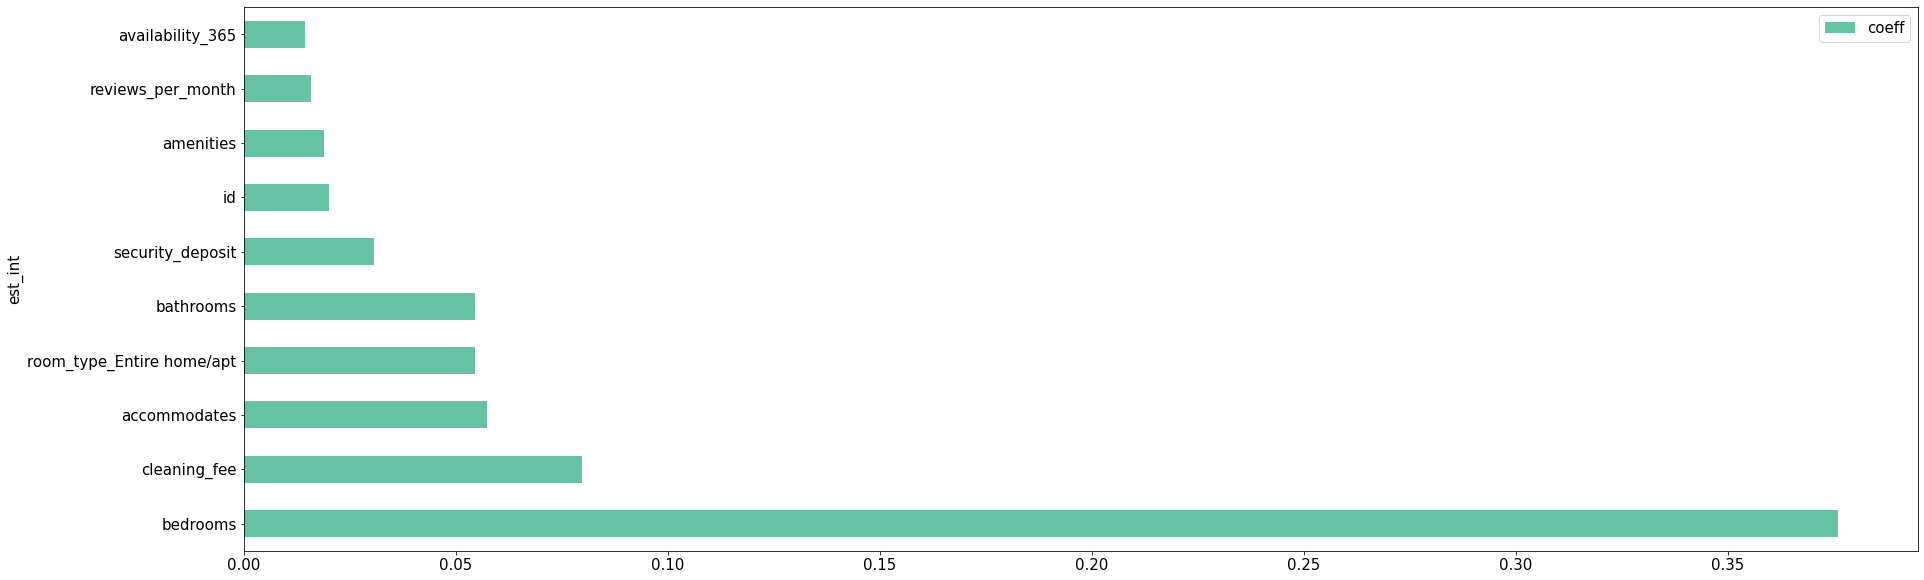

In [ ]:
plt.rcParams.update({'font.size': 15})
my_cmap = plt.get_cmap("Set2")
coeff_dataframe.sort_values('coeff', ascending=False).head(10).plot(kind = 'barh',figsize = (30,10), color=my_cmap.colors);


As you can see, The size of the accomation is the greatest influencer on price.

The price of the accomations also strongly correlates to the cleaning fee, security deposit and number of amenities.